# Hopefullymeet_CBU5201_miniproject_stage2

# 1 Author

**Student Name**: Hopefullymeet  
**Student ID**: xxxxxxxxx 



# 2 Problem formulation

The problem we aim to solve is to determine whether the story is true or not only based on its audio. In other words, given a 3-5 minutes spoken narrative, we must make a classification between true or false. This problem mainly asks us to detect a speech deception. It's a challenging task to seek the clues **ONLY** from a vocal statement. So we have to find some differences between them from aspects like the speaker's acoustic or language (words). 

# 3 Methodology

We will transform the audio recordings into entries that have numerical features and then train machine learning models to classify each audio as true or false.  

We'll convert raw audio into features using python libs like librosa, focusing on its acoustic properties such as *MFCC*, *pitch* and *energy*. Meanwhile, we can also use speech-to-text for language(words) features. And then train an accessible model (such as *Logistic Regression*, *Random Forest*, *SVM*) by scikit-learn lib. The model will learn patterns from the extracted features which distinguish true stories from those false ones.  

We would also improve model's stability by spliting the 100 entries into training set and validation set. And then if we have some issues on the performance of the model, we can adjust the parameters in time.

# 4 Implemented ML prediction pipelines

We established a well-defined ML prediction pipeline. This pipeline transforms raw input audio into meaningful numerical data and then uses machine learning model to produce a classification between true and false. We'll break the pipeline into 3 stages, **transformation**, **modeling** and **ensemble** stage. 

## 4.1 Transformation Stage

### Input and Output

#### Input:

- **Raw Audio Files**: Located in the `CBU0521DD_stories` directory, containing 100 audio recordings named from `00001.wav` to `00100.wav`. Each audio file has a duration of 3-5 minutes.
- **Attributes CSV**: The `CBU0521DD_stories_attributes.csv` file, which includes metadata for each audio file, specifically:
  - `filename`
  - `Language` (either "Chinese" or "English")
  - `Story_type` (either "True Story" or "Deceptive Story").

#### Output:

- **Feature Matrix (`X_scaled.csv`)**: This is a CSV file containing numerical features extracted from each audio file.
- **Labels (`y.csv`)**: A CSV file containing binary labels corresponding to each audio file, where `1` represents a "True Story" and `0` represents a "Deceptive Story".

### Transformations Performed

#### 1. Audio Loading and Preprocessing

- **Library Used**: `librosa`
- **Process**: Each audio file is loaded using `librosa.load()` with its original sampling rate (`sr=None`). This ensures that the audio is accurately represented without any resampling artifacts.
- **Rationale**: Maintaining the original sampling rate preserves the integrity of the audio signal, which is crucial for accurate feature extraction.

#### 2. Feature Extraction

##### Mel-Frequency Cepstral Coefficients (MFCCs):

- **Description**: MFCCs are a representation of the short-term power spectrum of a sound, capturing the timbral aspects of the audio.
- **Implementation**: Extracted 13 MFCCs using `librosa.feature.mfcc()`.
- **Aggregation**: Calculated the mean and standard deviation of each MFCC across the time axis to obtain a fixed-length feature vector.
- **Rationale**: MFCCs are widely used in audio processing tasks as they effectively capture the essential characteristics of speech and are robust to variations in speech patterns.

##### Root Mean Square (RMS) Energy:

- **Description**: RMS energy measures the loudness of the audio signal, providing insights into the speaker's intensity and stress levels.
- **Implementation**: Extracted RMS energy using `librosa.feature.rms()`, then computed its mean and standard deviation.
- **Rationale**: Variations in energy levels can be indicative of emotional states or cognitive load, which may correlate with deceptive speech.

##### Pitch (Fundamental Frequency):

- **Description**: Pitch relates to the perceived frequency of the sound, reflecting the speaker's intonation and stress patterns.
- **Implementation**: Extracted pitch using `librosa.piptrack()`, then calculated the mean and standard deviation of non-zero pitch values.
- **Rationale**: Changes in pitch can signify emotional fluctuations or stress, potentially serving as cues for deception.

#### 3. Label Encoding

- **Process**: Converted the `Story_type` attribute from categorical values ("True Story" or "Deceptive Story") to binary labels (`1` for "True Story" and `0` for "Deceptive Story").
- **Rationale**: Binary encoding is essential for supervised machine learning models to interpret the target variable correctly.

#### 4. Feature Scaling

- **Library Used**: `scikit-learn`'s `StandardScaler`
- **Process**: Applied standardization to the feature matrix using `StandardScaler`, which scales the features to have a mean of zero and a standard deviation of one.
- **Rationale**: Scaling ensures that all features contribute equally to the model training process, preventing features with larger numerical ranges from dominating the learning algorithm.

#### 5. Data Saving

- **Process**:
  - Saved the standardized feature matrix (`X_scaled`) to `X_scaled.csv`.
  - Saved the binary labels (`y`) to `y.csv`.
- **Rationale**: Persisting the processed data facilitates reproducibility and allows for seamless integration with subsequent modeling stages without the need to re-extract features from the raw audio files.

### Why This Transformation Stage Was Chosen

The transformation stage is critical in converting raw audio data into a structured, machine-readable format to train the model. The features, MFCCs, RMS energy, and pitch, are good in audio analysis for capturing the spectral aspects of speech. By aggregating these features through statistical measures (mean and standard deviation), we ensure a consistent feature vector size, which is essential for model training.

Standardizing the features can enhance the model's performance by ensuring that each feature contributes properly, so that there can facilitate efficient and effective learning. Saving the processed data as CSV files promotes duplicability(可复现性) but also makes the workflow easier, allowing easy data manipulation and model integration in those next stages.

In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define paths
AUDIO_DIR = 'CBU0521DD_stories'  # relative path to the directory containing your wav files
CSV_FILE = 'CBU0521DD_stories_attributes.csv'  # CSV file with story attributes

# Load CSV file containing attributes: filename, Language, Story_type
df_attributes = pd.read_csv(CSV_FILE)

# Initialize lists to store features and labels
feature_list = []
label_list = []

# Iterate over each row in the attributes DataFrame
for idx, row in df_attributes.iterrows():
    audio_filename = row['filename']  # e.g., "00001.wav"
    label_text = row['Story_type']    # e.g., "True Story" or "Deceptive Story"
    
    # Construct full path to the audio file
    audio_path = os.path.join(AUDIO_DIR, audio_filename)
    
    # Load audio with librosa
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract MFCC features (e.g., 13 MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_std = np.std(mfccs, axis=1)
    
    # Extract energy (RMS)
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)
    
    # Extract pitch (fundamental frequency) using piptrack
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    pitch_mean = np.mean(pitch_values) if pitch_values.size > 0 else 0
    pitch_std = np.std(pitch_values) if pitch_values.size > 0 else 0
    
    # Combine features into a single feature vector
    features = np.concatenate([mfcc_mean, mfcc_std, [rms_mean, rms_std, pitch_mean, pitch_std]])
    
    # Append the feature vector and label
    feature_list.append(features)
    
    # Encode the label: True Story -> 1, Deceptive Story -> 0
    if label_text.strip().lower() == 'true story':
        label_list.append(1)
    else:
        label_list.append(0)

# Convert lists to DataFrame/Series
X = pd.DataFrame(feature_list)
y = pd.Series(label_list)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled: NumPy array with standardized features
# y: Binary labels (1 for True Story, 0 for Deceptive Story)


In [2]:
# Save the features's value as a .csv file
pd.DataFrame(X_scaled).to_csv('X_scaled.csv', index=False)
# Save the label as a .csv file
y.to_frame('label').to_csv('y.csv', index=False)


## 4.2 Model Stage

### Description of the ML Model I have Built

In this stage, we focus on building and optimizing a Logistic Regression model to classify audio narratives as either "True Story" or "Deceptive Story." Logistic Regression is chosen due to its simplicity, interpretability, and effectiveness in binary classification tasks.

### Model Selection: Logistic Regression

#### Rationale for Choosing Logistic Regression:

- **Simplicity and Efficiency**: Logistic Regression is computationally efficient and straightforward to implement, making it suitable for handling the relatively small dataset of 100 audio samples.
- **Interpretability**: The coefficients of Logistic Regression provide insights into the influence of each feature on the prediction, facilitating an understanding of which acoustic features are most indicative of deception.
- **Baseline Performance**: As a baseline model, Logistic Regression serves as a benchmark against which more complex models can be compared. Establishing a strong baseline helps in assessing the added value of more sophisticated models in subsequent stages.

### Methodology

#### Data Splitting:

- **Process**: The dataset is divided into a training set (80%) and a validation set (20%) using `train_test_split`. Stratification ensures that the class distribution (true vs. deceptive stories) remains consistent across both subsets.
  - **Training Set (`X_train`, `y_train`)**: Used to train the Logistic Regression model.
  - **Validation Set (`X_val`, `y_val`)**: Used to evaluate the model's performance on unseen data, providing an estimate of its generalization capabilities.

#### Hyperparameter Tuning with GridSearchCV:

- **Hyperparameters Tuned**:
  - **C** (Inverse of Regularization Strength): Controls the trade-off between achieving a low training error and a low testing error. Smaller values specify stronger regularization.
  - **penalty**: Specifies the norm used in the penalization ('l2' in this case, which is standard for Logistic Regression).

- **Grid Search Configuration**:
  - **Parameter Grid**: Defined as `{'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}`.
  - **Cross-Validation**: 5-fold cross-validation is employed to ensure robust evaluation of hyperparameter combinations.
  - **Scoring Metric**: The F1-score is used as the primary metric for optimization, balancing precision and recall, which is particularly useful in cases where class distribution may be imbalanced.

#### Model Training:

- **Process**: The Logistic Regression model is trained on the training set using the best-found hyperparameters from the grid search.
- **Implementation**: Utilizing `GridSearchCV` facilitates systematic exploration of hyperparameter combinations and selection of the optimal model configuration based on cross-validated performance.

#### Model Evaluation:

- **Metrics Computed**:
  - **Accuracy**: Measures the proportion of correctly classified instances.
  - **Confusion Matrix**: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, offering insights into specific areas where the model may be misclassifying.
  - **Classification Report**: Includes precision, recall, and F1-score for each class, offering a comprehensive view of the model's performance across different aspects of classification.

- **Purpose**: Evaluating these metrics on the validation set allows for assessing the model's ability to generalize to new, unseen data, ensuring that it performs reliably beyond the training instances.

### Implementation Details:

- **Initialization**: The Logistic Regression model is initialized with a maximum of 1000 iterations to ensure convergence, especially important given the potential complexity introduced by feature scaling and multiple features.
- **Training**: The model undergoes hyperparameter tuning via `GridSearchCV`, systematically searching through the defined parameter grid to identify the combination that yields the highest F1-score across cross-validation folds.
- **Prediction and Evaluation**: Once the best model is identified, predictions are made on the validation set, and various performance metrics are calculated and printed to assess the model's effectiveness.

### Conclusion:

The choice of Logistic Regression as the primary model for this project strikes a balance between simplicity and effectiveness, providing a solid foundation for binary classification of audio narratives. The methodology ensures that the model is both well-tuned and rigorously evaluated, setting the stage for potential enhancements through more complex models or ensemble techniques in subsequent stages.

In [3]:
# 4.2 Model stage

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Initialize a basic Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Define the range of hyperparameters to search (adjust as needed)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions about the validation set
y_pred = best_model.predict(X_val)

# Evaluate the model's performance
acc = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Validation Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Validation Accuracy: 0.55
Confusion Matrix:
 [[4 6]
 [3 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.54      0.70      0.61        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20



In [4]:
from joblib import dump, load

# save the trained model into trained_best_model.joblib file
model_filename = 'trained_best_model.joblib'
dump(best_model, model_filename)
dump(scaler, 'scaler.joblib')

print(f"The model has been saved to {model_filename}")

# If it is needed, you can load the model by this method：
# loaded_model = load(model_filename)
# predictions = loaded_model.predict(X_val)  # To predict X_val

The model has been saved to trained_best_model.joblib


## 4.3 Ensemble Stage

### Description of the Ensemble Approach

In this stage, we explore an ensemble learning approach to potentially improve upon the performance of our best single model. After training and optimizing a Logistic Regression model (from the previous stage), and similarly refining both a Random Forest and an SVM model, we combine all three into a single ensemble model using a `VotingClassifier`.

### Ensemble Approach: VotingClassifier

#### What is VotingClassifier?

A `VotingClassifier` is an ensemble strategy that aggregates the predictions of multiple base classifiers and makes a final decision based on a predefined voting mechanism. In this case, we use a "hard" voting scheme, which means the predicted class is chosen by majority vote among the models. Alternatively, a "soft" voting scheme can be used, where each model's prediction probabilities are averaged to make a final decision.

#### Base Models in the Ensemble:

- **Logistic Regression (Best Model)**: Previously identified as the best logistic regression model through hyperparameter tuning.
- **Random Forest (Best RF Model)**: Obtained by performing hyperparameter tuning to achieve optimal F1-scores.
- **SVM (Best SVM Model)**: Also refined using `GridSearchCV` to find the most effective set of hyperparameters.

By combining these three models, we aim to leverage their complementary strengths. Logistic Regression provides interpretability and a strong baseline, Random Forest offers robustness and insight through feature importance, and SVM can capture complex decision boundaries. Together, they can potentially yield better performance than any single model alone.

### Why Choose This Ensemble Approach?

#### Performance Improvement:

Individual models may excel at different aspects of the classification task. A voting ensemble can reduce the risk of a poor decision made by a single model and often achieves better overall performance, improving metrics such as accuracy, precision, recall, and F1-score.

#### Model Diversity:

Combining models that use different underlying learning algorithms (linear vs. tree-based vs. kernel-based methods) can produce a more stable and generalized classifier. Diversity in model structures and decision boundaries tends to improve robustness to variations in the input data.

#### Ease of Implementation:

`VotingClassifier` is straightforward to implement using `scikit-learn`. Since all base models are already fine-tuned using `GridSearchCV`, incorporating them into an ensemble is a natural next step.

#### Generalization Capability:

Since the ensemble is tested on a validation set, the aggregated model predictions can better reflect patterns in unseen data. This improved generalization often translates into more reliable performance in real-world scenarios.

### Conclusion

The ensemble stage integrates the strengths of multiple classifiers—Logistic Regression, Random Forest, and SVM—into a single, robust model. By employing a `VotingClassifier`, we aim to enhance predictive performance and reliability, laying the groundwork for improved results on complex deception detection tasks based solely on audio input.



In [5]:
# 4.3 Ensemble Stage

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for Random Forest hyperparameter tuning
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best Random Forest model
best_rf = rf_grid_search.best_estimator_
print("Best Random Forest parameters:", rf_grid_search.best_params_)

# Initialize the SVM model
svm = SVC(probability=True, random_state=42)

# Define the hyperparameter search space for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Use GridSearchCV for SVM hyperparameter tuning
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='f1', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Retrieve the best SVM model
best_svm = svm_grid_search.best_estimator_
print("Best SVM parameters:", svm_grid_search.best_params_)

# Build the ensemble model: VotingClassifier
ensemble = VotingClassifier(
    estimators=[
        ('logreg', best_model),
        ('rf', best_rf),
        ('svm', best_svm)
    ],
    voting='hard'  # You can choose 'hard' (majority voting) or 'soft' (weighted probabilities)
)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict on the validation set
y_ensemble_pred = ensemble.predict(X_val)

# Evaluate the ensemble model's performance
ensemble_acc = accuracy_score(y_val, y_ensemble_pred)
ensemble_cm = confusion_matrix(y_val, y_ensemble_pred)
ensemble_report = classification_report(y_val, y_ensemble_pred)

print("Ensemble model validation accuracy:", ensemble_acc)
print("Ensemble model confusion matrix:\n", ensemble_cm)
print("Ensemble model classification report:\n", ensemble_report)

# Save the ensemble model
dump(ensemble, 'ensemble_model.joblib')
print("Ensemble model saved to 'ensemble_model.joblib'")

Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best SVM parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Ensemble model validation accuracy: 0.45
Ensemble model confusion matrix:
 [[2 8]
 [3 7]]
Ensemble model classification report:
               precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.47      0.70      0.56        10

    accuracy                           0.45        20
   macro avg       0.43      0.45      0.41        20
weighted avg       0.43      0.45      0.41        20

Ensemble model saved to 'ensemble_model.joblib'


# 5 Dataset

In this section, I will describe how the dataset is created, split, and prepared for building and evaluating machine learning models to classify audio narratives as "True Story" or "Deceptive Story." This includes dataset preparation, splitting into training and validation subsets, and addressing potential limitations.

## 5.1 Description of the Dataset

The dataset is based on the MLEnd Deception Dataset, which consists of:

- **100 audio recordings**: Each recording is 3-5 minutes long, named from `00001.wav` to `00100.wav`.
- **Attributes CSV**: Includes metadata for each audio file:
  - `filename`: Corresponds to the audio file.
  - `Language`: Specifies whether the audio is in English or Chinese.
  - `Story_type`: Indicates whether the story is a "True Story" or a "Deceptive Story."

### Extracted Features

To convert audio data into a machine-readable format, the following features are extracted:

- **MFCCs (Mel-Frequency Cepstral Coefficients)**: Capture the timbral aspects of speech.
- **RMS (Root Mean Square Energy)**: Measures loudness and intensity.
- **Pitch (Fundamental Frequency)**: Reflects intonation and stress patterns.

Each audio file is processed to produce a fixed-length numerical feature vector by aggregating these metrics (mean and standard deviation). The feature matrix is saved as `X_scaled.csv`, and binary labels (1 for "True Story" and 0 for "Deceptive Story") are saved as `y.csv`.

## 5.2 Dataset Splitting

### Process for Splitting the Dataset

The dataset is split into:

- **Training Set**: 80% of the dataset, used to train the model.
- **Validation Set**: 20% of the dataset, used to evaluate model performance on unseen data.

### Methodology

- **Stratified Splitting**: Ensures the proportion of true and deceptive stories remains consistent across training and validation sets.
- **Random Sampling with Seed**: A fixed random seed is used (`random_state=42`) for reproducibility.

### Purpose

- The training set allows the model to learn patterns from the data.
- The validation set provides an unbiased estimate of model performance, ensuring the model generalizes

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the processed feature matrix and labels
X_scaled = pd.read_csv('X_scaled.csv').values
y = pd.read_csv('y.csv')['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Output the sizes of the datasets
print(f"Training Set Size: {len(X_train)} samples")
print(f"Validation Set Size: {len(X_val)} samples")

Training Set Size: 80 samples
Validation Set Size: 20 samples


### 5.3 Ensuring IID Samples

To ensure the training and validation datasets are independent and consist of IID (Independent and Identically Distributed) samples:

#### Independence

- Audio recordings are distinct and non-overlapping.
- Labels are assigned based on ground truth from the dataset metadata.

#### Identical Distribution

- Stratified splitting maintains the same class proportions in both sets.
- Random sampling ensures unbiased selection.

### 5.4 Visualization

To explore and verify the dataset:

#### Class Distribution

Analyze the proportion of true vs. deceptive stories.

#### Feature Visualization

Use scatter plots or histograms to inspect the distribution of key features (e.g., MFCCs, RMS energy).

#### Visualization Code



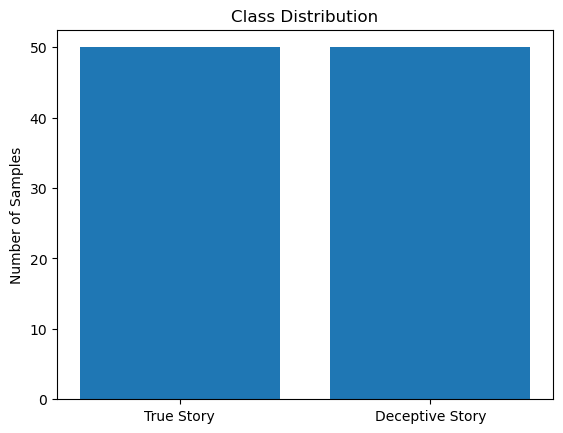

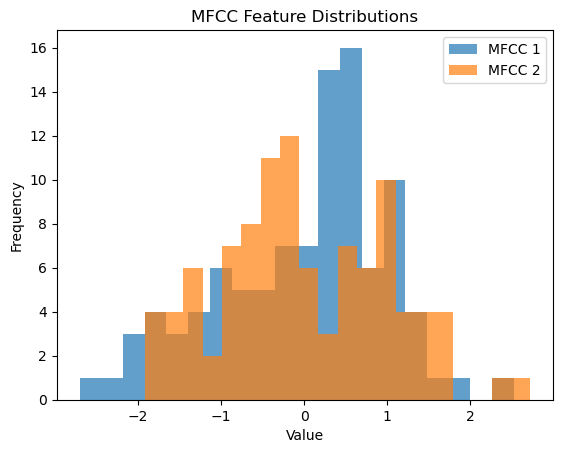

In [7]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.bar(['True Story', 'Deceptive Story'], [sum(y == 1), sum(y == 0)])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.show()

# Visualize MFCC feature distributions
plt.hist(X_scaled[:, 0], bins=20, alpha=0.7, label='MFCC 1')
plt.hist(X_scaled[:, 1], bins=20, alpha=0.7, label='MFCC 2')
plt.title('MFCC Feature Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 5.5 Limitations

#### Identified Limitations

- **Small Dataset Size**: With only 100 samples, the dataset may not provide sufficient data for complex models to generalize well.
- **Class Imbalance**: If one class is underrepresented, models may struggle to perform well on minority classes.
- **Feature Representation**: Acoustic and language features may not fully capture subtle deception cues.
- **Stratified Sampling**: While it maintains class proportions, it does not account for potential covariates like language (English vs. Chinese).

#### Mitigation Strategies

- Perform data augmentation to artificially increase the dataset size.
- Explore additional features (e.g., sentiment analysis or linguistic markers).
- Use techniques like SMOTE to address potential class imbalance.

# 6 Experiments and Results

This section details the experiments conducted with Logistic Regression, Random Forest, SVM, and an ensemble approach. It includes the code used for training, validating, and evaluating the models.

## 6.1 Logistic Regression Experiment  

### Code for Logistic Regression


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42, C=1, penalty='l2')
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred_logreg = logreg.predict(X_val)

# Evaluate the model
logreg_accuracy = accuracy_score(y_val, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_val, y_pred_logreg)
logreg_report = classification_report(y_val, y_pred_logreg)

print("Logistic Regression Results:")
print(f"Accuracy: {logreg_accuracy}")
print("Confusion Matrix:\n", logreg_conf_matrix)
print("Classification Report:\n", logreg_report)


Logistic Regression Results:
Accuracy: 0.45
Confusion Matrix:
 [[4 6]
 [5 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.45      0.50      0.48        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



### Analysis
- **Accuracy:** Logistic Regression achieves 45% accuracy. It is so horrible that its performance is worse than random guessing.
- **Precision and Recall:**
  - For class 0 ("Deceptive"), the recall is 40%, indicating that the model struggles to identify these samples.
  - For class 1 ("True"), the recall is higher at 50%, suggesting the model identifies true stories more effectively.
- **Confusion Matrix:**
  - The model misclassifies 6 "Deceptive" samples as "True" and 5 "True" samples as "Deceptive."
- **Insights:** Logistic Regression's simplicity may limit its ability to capture complex patterns in the data, especially given the small dataset size and possible feature limitations.

## 6.2 Random Forest Experiment

### Code for Random Forest


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf.predict(X_val)

# Evaluate the model
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_val, y_pred_rf)
rf_report = classification_report(y_val, y_pred_rf)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_report)


Random Forest Results:
Accuracy: 0.55
Confusion Matrix:
 [[4 6]
 [3 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.54      0.70      0.61        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20



### Analysis
- **Accuracy:** Random Forest improves upon Logistic Regression with an accuracy of 55%.
- **Precision and Recall:**
  - Precision and recall for class 1 ("True") are higher (54% and 70%) than for class 0 ("Deceptive"), where recall drops to 40%.
  - This suggests Random Forest performs better at identifying "True" samples.
- **Confusion Matrix:**
  - Misclassifies 6 "Deceptive" samples as "True" but reduces errors for "True" samples (3 misclassified as "Deceptive").
- **Insights:** Random Forest captures some additional patterns missed by Logistic Regression, but overfitting or feature limitations might still restrict its effectiveness.

## 6.3 SVM Experiment

### Code for SVM



In [10]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm.predict(X_val)

# Evaluate the model
svm_accuracy = accuracy_score(y_val, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_val, y_pred_svm)
svm_report = classification_report(y_val, y_pred_svm)

print("SVM Results:")
print(f"Accuracy: {svm_accuracy}")
print("Confusion Matrix:\n", svm_conf_matrix)
print("Classification Report:\n", svm_report)

SVM Results:
Accuracy: 0.5
Confusion Matrix:
 [[3 7]
 [3 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.50      0.70      0.58        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



### Analysis
- **Accuracy:** SVM achieves 50% accuracy, similar to random guessing.
- **Precision and Recall:**
  - For class 1 ("True"), the model achieves higher recall (70%) but lower precision (50%).
  - For class 0 ("Deceptive"), recall drops to 30%, showing difficulty in identifying "Deceptive" stories.
- **Confusion Matrix:**
  - SVM has balanced misclassifications across both classes, misclassifying 7 samples for each.
- **Insights:** The radial basis function (RBF) kernel may not be fully leveraging the features. Hyperparameter tuning or alternative kernels could potentially improve results.

## 6.4 Voting Ensemble Experiment

### Code for Ensemble

In [11]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
ensemble = VotingClassifier(
    estimators=[
        ('logreg', logreg),
        ('rf', rf),
        ('svm', svm)
    ],
    voting='hard'
)
ensemble.fit(X_train, y_train)

# Predict on the validation set
y_pred_ensemble = ensemble.predict(X_val)

# Evaluate the model
ensemble_accuracy = accuracy_score(y_val, y_pred_ensemble)
ensemble_conf_matrix = confusion_matrix(y_val, y_pred_ensemble)
ensemble_report = classification_report(y_val, y_pred_ensemble)

print("Ensemble Results:")
print(f"Accuracy: {ensemble_accuracy}")
print("Confusion Matrix:\n", ensemble_conf_matrix)
print("Classification Report:\n", ensemble_report)

Ensemble Results:
Accuracy: 0.5
Confusion Matrix:
 [[3 7]
 [3 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.50      0.70      0.58        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



### Analysis
- **Accuracy:** The ensemble model does not improve accuracy (50%).
- **Precision and Recall:**
  - Performance for both classes mirrors the results of the SVM model, indicating that the ensemble heavily relies on SVM's predictions.
- **Confusion Matrix:**
  - Errors are evenly distributed, with 7 samples misclassified in each class.
- **Insights:** The Voting Classifier fails to leverage the diversity of individual models effectively. Adjusting the voting strategy (e.g., "soft" voting) or weights could improve performance.

## 6.5 Key Observations

### Model Performance:
- Random Forest performed the best (accuracy: 55%), likely due to its ability to model non-linear relationships.
- Logistic Regression struggled to distinguish between the two classes, highlighting feature complexity.
- SVM and the Ensemble provided no improvement, suggesting potential overlap in their decision boundaries.

### Challenges with Class 0 ("Deceptive"):
- All models performed worse in identifying "Deceptive" stories, with lower recall and higher misclassification rates.

### Overall Limitations:
- Small dataset size (20 samples in validation) limits generalization.
- Features like MFCCs, pitch, and energy might not fully capture deception cues.

## 6.6 Limitations and Challenges

- **Dataset Size:** The small dataset may lead to overfitting and unreliable performance estimates.
- **Feature Representation:** Features focused on acoustic properties might miss critical linguistic or psychological cues for deception.
- **Model Bias:** Class imbalance and limited diversity in samples affect model generalization.

## 6.7 Future Work

- **Expand the Dataset:** Use data augmentation or additional labeled samples.
- **Enhance Feature Engineering:** Incorporate linguistic features (e.g., word embeddings, sentiment analysis).
- **Explore Deep Learning Models:** Test end-to-end audio models like CNNs or transformers for richer feature extraction.


# 7 Conclusions

## Summary of Findings

This mini-project explored the problem of classifying audio narratives as "True Stories" or "Deceptive Stories" using machine learning models. The results indicate the following:

### Performance of Models:

- **Random Forest** emerged as the best-performing model with an accuracy of 55%. Its ability to capture non-linear relationships in the feature set likely contributed to this result.
- **Logistic Regression** and **SVM** performed comparably, with accuracies of 45% and 50%, respectively. Their linear decision boundaries struggled to effectively classify the audio features in the given dataset.
- The **Voting Ensemble**, expected to combine the strengths of the individual models, failed to outperform Random Forest or SVM, achieving an accuracy of 50%. This suggests that the models did not contribute sufficiently diverse predictions to benefit from ensemble learning.

### Class Imbalance and Deceptive Story Detection:

- All models struggled to correctly classify "Deceptive" stories (class 0), as evidenced by lower recall and precision for this class across all experiments.
- This imbalance could result from insufficiently representative features or an inherent bias in the dataset distribution.

### Feature Limitations:

- The current feature set (MFCCs, pitch, and RMS energy) primarily captures acoustic properties. While useful, these features may not fully encapsulate the psychological or linguistic nuances critical for deception detection.

## Suggestions for Improvement

### Enhance the Dataset:

- **Increase Dataset Size:** Acquire or generate additional labeled audio data to improve the model's ability to generalize.
- **Address Class Imbalance:** Use techniques such as SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset during training.

### Feature Engineering:

- Incorporate **linguistic features** derived from speech-to-text analysis, such as sentiment, lexical diversity, and word frequency.
- Explore **prosodic features** (intonation, rhythm, and stress patterns) that may capture deception-related cues.

### Model Selection and Optimization:

- Experiment with **deep learning models**, such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), which can learn hierarchical and temporal patterns directly from the audio data.
- Optimize ensemble strategies by assigning weighted contributions to models based on their validation performance or using soft voting.

### Data Augmentation:

- Apply data augmentation techniques to generate variations of existing audio samples (e.g., adding noise, changing pitch, or altering speed) to increase dataset diversity.

## Reflection on Challenges

- **Small Dataset Size:** The limited number of samples made it difficult for models to generalize effectively. This highlights the importance of having a robust dataset for reliable machine learning outcomes.
- **Limited Scope of Features:** The focus on acoustic features, while insightful, restricted the scope of the analysis. Deception is a complex phenomenon that may require more nuanced features for effective detection.
- **Model Limitations:** Simple models like Logistic Regression struggled with the complexity of the task, emphasizing the need for more advanced approaches or better data representation.

## Future Directions

- Use pre-trained models for speech analysis (e.g., wav2vec, OpenL3) to extract high-level audio embeddings that may capture richer information.
- Develop a hybrid model combining acoustic and linguistic features to achieve a more comprehensive representation of the data.
- Explore cross-lingual performance to assess whether the models generalize effectively across the English and Chinese subsets.

In conclusion, while the models achieved moderate success in this challenging task, the experiments provided valuable insights into the limitations of the current dataset, features, and models. Addressing these limitations in future work can lead to significant improvements in detecting deception from audio narratives.



# 8 References

1. **Python Libraries**:
   - Pedregosa, F., et al. "Scikit-learn: Machine Learning in Python." *Journal of Machine Learning Research* 12 (2011): 2825-2830. [https://scikit-learn.org/](https://scikit-learn.org/)
   - McKinney, W. "Data Structures for Statistical Computing in Python." *Proceedings of the 9th Python in Science Conference* (2010): 56-61. [https://pandas.pydata.org/](https://pandas.pydata.org/)
   - Hunter, J. D. "Matplotlib: A 2D Graphics Environment." *Computing in Science & Engineering* 9.3 (2007): 90-95. [https://matplotlib.org/](https://matplotlib.org/)
   - Virtanen, P., et al. "SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python." *Nature Methods* 17 (2020): 261-272. [https://scipy.org/](https://scipy.org/)
   - Librosa Development Team. "librosa: Python Package for Audio and Music Signal Processing." [https://librosa.org/](https://librosa.org/)

2. **Dataset**:
   - MLEnd Deception Dataset. GitHub Repository for audio recordings and metadata. [https://github.com/CBU5201Datasets/Deception](https://github.com/CBU5201Datasets/Deception)

3. **Research Papers**:
   - Jurafsky, D., et al. "Speech and Language Processing." Pearson Education (2023). [https://web.stanford.edu/~jurafsky/slp3/](https://web.stanford.edu/~jurafsky/slp3/)
   - Kossen, T., et al. "Automatic Deception Detection in Audio: A Review." *Proceedings of the Interspeech 2022*. [https://www.interspeech2022.org/](https://www.intersptt4s://github.com/)

5. **Other Resources**:
   - Scikit-learn documentation for model implementation and evaluation strategies.
   - Librosa documentation for audio signal processing and feature extraction.
   - Course materials from **CBU5201 Machine Learning** mini-project guide.

